#Лабораторна робота №8

Завдання №1

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Завантаження датасету
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

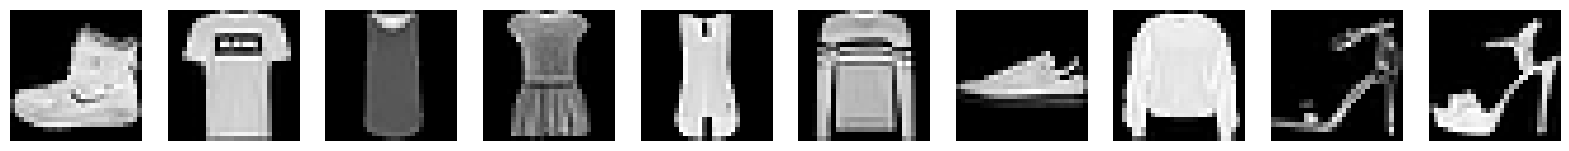

In [ ]:
# Відображення 10 зображень з датасету
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Побудова моделі з використанням Input
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Використання ранньої зупинки та зменшення швидкості
early_stop = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

# Тренування моделі
history = model.fit(x_train, y_train,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop, reduce_lr])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7779 - loss: 0.6316 - val_accuracy: 0.8492 - val_loss: 0.4121 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8653 - loss: 0.3726 - val_accuracy: 0.8523 - val_loss: 0.4030 - learning_rate: 0.0010
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.8768 - loss: 0.3340 - val_accuracy: 0.8707 - val_loss: 0.3639 - learning_rate: 0.0010
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8857 - loss: 0.3086 - val_accuracy: 0.8667 - val_loss: 0.3643 - learning_rate: 0.0010
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8918 - loss: 0.2907 - val_accuracy: 0.8744 - val_loss: 0.3471 - learning_rate: 0.0010
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8952 - loss: 0.2798 - val_accuracy: 0.8732 - val_loss: 0.3538 - learning_rate: 0.0010
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9010

In [ ]:
# Виведення архітектури моделі
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Збереження моделі
model.save('/content/drive/My Drive/fashion_mnist_model.keras')

Mounted at /content/drive


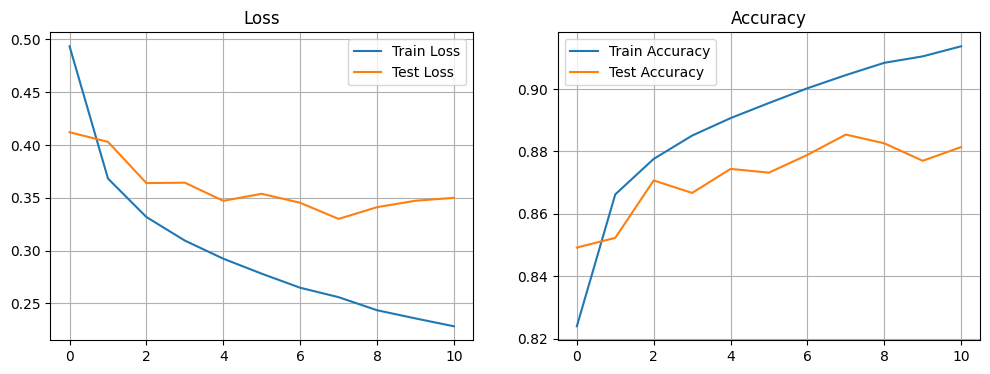

In [ ]:
# Побудова графіків функції втрат і точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Прогнозування на тестових даних
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

# Класифікаційний звіт
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1000
           1       1.00      0.96      0.98      1000
           2       0.82      0.77      0.79      1000
           3       0.89      0.90      0.90      1000
           4       0.80      0.80      0.80      1000
           5       0.99      0.95      0.97      1000
           6       0.64      0.79      0.71      1000
           7       0.92      0.98      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



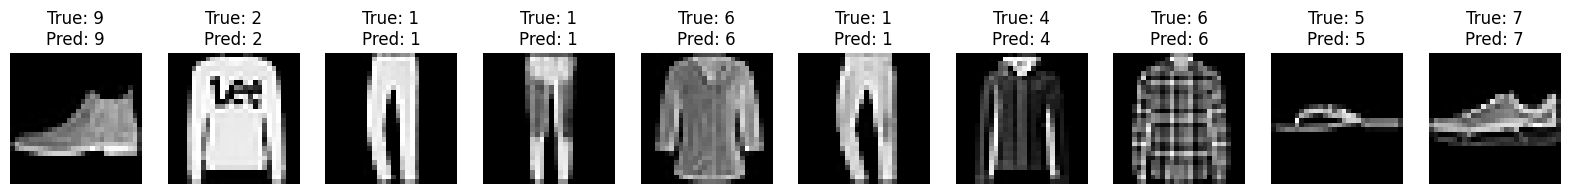

In [ ]:
# Виведення 10 результатів зображень із прогнозованим і справжнім класом
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i in range(10):
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"True: {y_test[i]}\nPred: {y_pred_classes[i]}")
plt.show()

Висновок: У даному завданні було побудовано багатошарову нейронну мережу для класифікації зображень з датасету Fashion, що містить зображення одягу. Модель була реалізована за допомогою бібліотеки Keras і навчена на тренувальному наборі даних.Після тренування моделі були побудовані графіки, що ілюструють функцію втрат та точність для тренувальних і тестових даних. Класифікаційний звіт, отриманий на тестових даних, показує наступні результати - максимальна точність: Клас 1 (1.00), Клас 5 (0.99) та Клас 8 (0.97) показали відмінні результати. Найнижча точність: Клас 6 (0.64) вимагатиме подальшого вдосконалення моделі.

Завдання 2

In [ ]:
!pip install -U keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner.tuners import RandomSearch

In [ ]:
# Завантаження набору даних Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    # Додавання шарів, які будуть тюнуватися
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                     min_value=32,
                                     max_value=512,
                                     step=32),
                        activation='relu',
                        kernel_regularizer=l2(0.001)))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

    model.add(Dense(10, activation='softmax'))

    # Компіляція моделі з оптимізатором, який також буде тюнуватися
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # збільшення кількості спроб для кращих результатів
    executions_per_trial=1,
    directory='tuner_logs',
    project_name='fashion_mnist_classification'
)

# Визначення ранньої зупинки та зниження швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

tuner.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

# Отримання найкращої моделі
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

# Тренування та оцінка моделі
best_model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

test_loss, test_acc = best_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Trial 10 Complete [00h 55m 04s]
val_accuracy: 0.8604000210762024

Best val_accuracy So Far: 0.8955000042915344
Total elapsed time: 03h 51m 19s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 160)                 │         125,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 160)                 │             640 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 318,986 (1.22 MB)

 Trainable params: 317,066 (1.21 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.8943 - loss: 0.3805 - val_accuracy: 0.8828 - val_loss: 0.4121 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8918 - loss: 0.3845 - val_accuracy: 0.8891 - val_loss: 0.3965 - learning_rate: 1.0000e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8931 - loss: 0.3768 - val_accuracy: 0.8807 - val_loss: 0.4122 - learning_rate: 1.0000e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8886 - loss: 0.3882 - val_accuracy: 0.8829 - val_loss: 0.4034 - learning_rate: 1.0000e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8942 - loss: 0.3778 - val_accuracy: 0.8834 - val_loss: 0.4104 - learning_rate: 1.0000e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.8982 - loss: 0.3609 - val_accuracy: 0.8913 - val_loss: 0.3774 - learning_rate: 5.0000e-05
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━

Висновок: в першому завданні - точність (Accuracy): 88% (0.88), а в другому завданні - точність (Accuracy): 89.92% (0.8992). У другому завданні точність склала 89.92%, що на 1.92% більше, ніж у завданні 1 (88%). Це свідчить про те, що модель у другому завданні має кращу здатність класифікувати зразки коректно. Модель у дугому завданні демонструє кращу продуктивність порівняно з моделлю із завдання 1.
https://github.com/maksim-poliovyi/machine-learning
